In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
import numpy as np
from scipy import ndimage


sys.path.append('../../shared')
from file_analyzer import FileAnalyzer


# Analyze your file
analyzer = FileAnalyzer('../../../data/MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv')
analyzer.print_summary()

# Get the DataFrame
df = analyzer.get_dataframe()

FILE ANALYSIS SUMMARY
📁 File: MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv
📊 Type: CSV
💾 Size: 523.4 KB
📈 Shape: (381, 9)
🔢 Columns: 9
📋 Rows: 381


In [35]:
# Create a cross-tabulation matrix of stations vs materials
# First, let's expand the materials for each station

station_material_data = []

for idx, row in df.iterrows():
    station = row['Agency']
    materials_list = [material.strip() for material in row['Art Material'].split(',')]
    
    for material in materials_list:
        station_material_data.append({
            'Station Name': station,
            'Material': material
        })

# Create DataFrame from expanded data
station_material_df = pd.DataFrame(station_material_data)
print(station_material_df['Station Name'].value_counts())

# Create cross-tabulation (crosstab)
station_material_matrix = pd.crosstab(station_material_df['Station Name'], 
                                      station_material_df['Material'], 
                                      margins=True, margins_name="Total")

print("Shape of station-material matrix:", station_material_matrix.shape)
print("\nFirst few rows and columns of the matrix:")
# Option 1: Get NYCT row, then filter columns containing 'Glass'
nyct_data = station_material_matrix.loc['NYCT']
nyct_glass = nyct_data[nyct_data.index.str.contains('Glass', na=False)]
print(nyct_glass)


Station Name
NYCT               365
Metro-North         57
LIRR                45
B&T                  3
MTA Bus Company      3
SIR                  3
Name: count, dtype: int64
Shape of station-material matrix: (7, 218)

First few rows and columns of the matrix:
Material
Ceramic and Glass mosaic                                                        1
Faceted Glass                                                                  12
Fused Glass                                                                     3
Glass                                                                           4
Glass Blocks                                                                    1
Glass Mosaic                                                                   15
Glass Mosaic and Ceramic Tile                                                   1
Glass and Ceramic Mosaic                                                        2
Glass and ceramic mosaic                                                

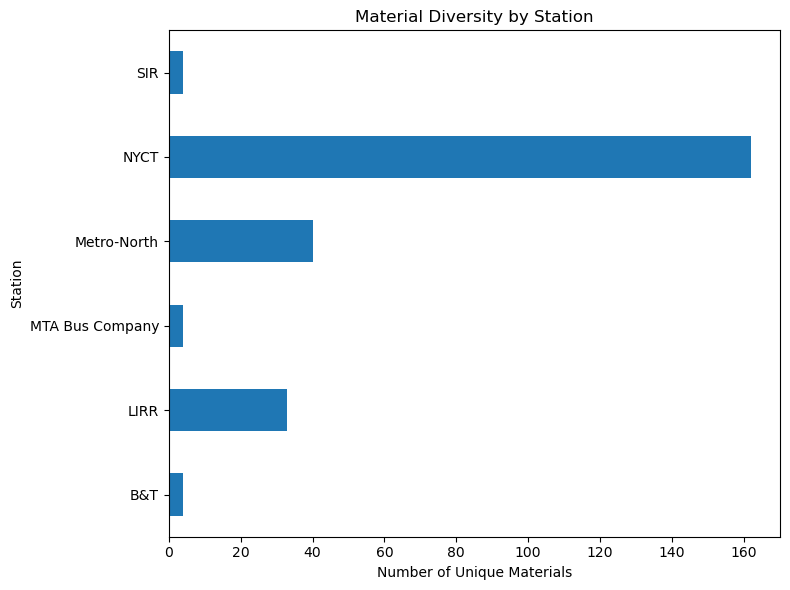

In [36]:
# Same data, horizontal bars
station_diversity = station_material_matrix.drop('Total').apply(lambda x: (x > 0).sum(), axis=1)

station_diversity.plot(kind='barh', figsize=(8, 6))
plt.title('Material Diversity by Station')
plt.xlabel('Number of Unique Materials')
plt.ylabel('Station')
plt.tight_layout()
plt.show()

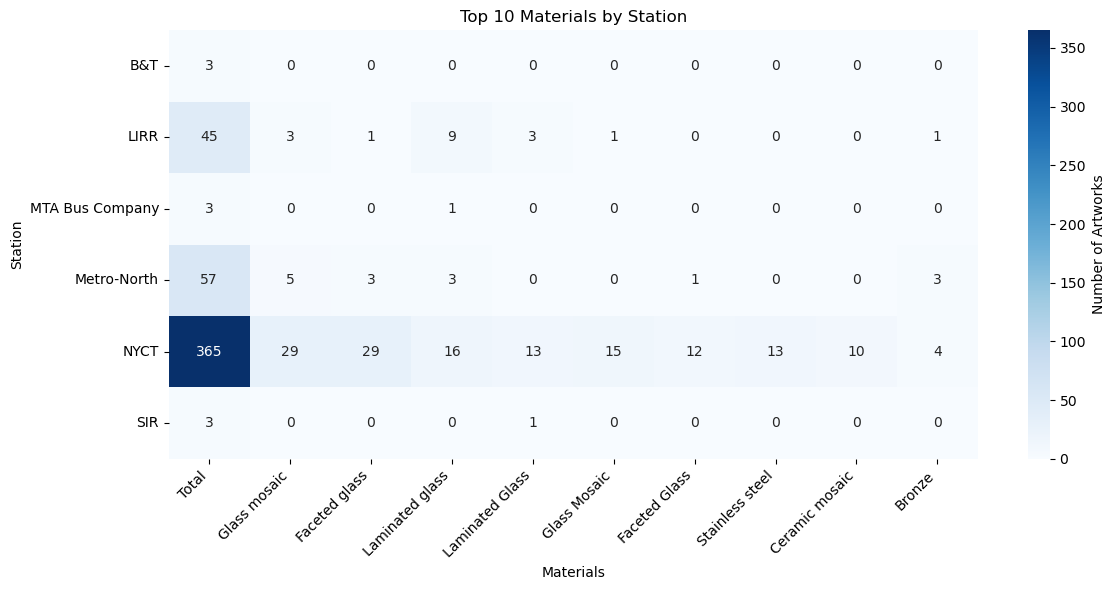

In [ ]:
# Claude (Anthropic). (2024). Seaborn heatmap visualization code for material diversity analysis. Personal communication.
top_materials = station_material_matrix.drop('Total').sum().nlargest(10).index
filtered_matrix = station_material_matrix.loc[station_material_matrix.index != 'Total', top_materials]

plt.figure(figsize=(12, 6))
sns.heatmap(filtered_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            cbar_kws={'label': 'Number of Artworks'})

plt.title('Top 10 Materials by Station')
plt.xlabel('Materials')
plt.ylabel('Station')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()